<a href="https://colab.research.google.com/github/bhagyashreeghude/Spark_foundation_task_1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation - Data Sience & Business Analytics Internship**

**Author :- Bhagyashree Ghude**

*Task 1: Predict the percentage of a student based on the no. study hours.*

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
# Reading data from remote link
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
# Top 5 rows of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Last five rows of dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# To find the number of rows and columns
df.shape

(25, 2)

In [6]:
# To find the more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# here we use describe() method so that we can able to see percentailes,mean,std,min,max,count of given dataset.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Visualizing the dataset**

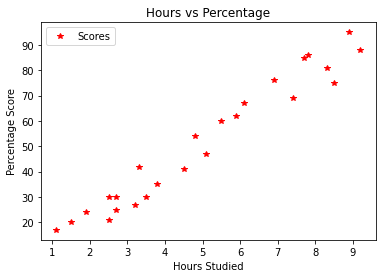

In [9]:
# Plotting the dataset
df.plot(x='Hours' , y='Scores' , style='*' , color='r')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph above , we can clearly see that there is a positive linear relation between the number of "hours studied" and "percentage score" .**

# **Preparing the data**

In this step we will devide the data into 'features'(inputs) and 'labels'(outputs).After that we will split the whole dataset into 2 parts- training data and testing data

In [10]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [11]:
# Spliting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

# **Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Visiualzing the model**

After training the model, now its time to visiualize it.

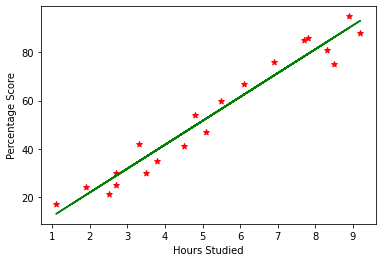

In [13]:
# Plotting the regression line
line= model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X_train,y_train, color='red', marker='*')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# **Making predictions**

In [14]:
# Testing data : in hours
print(X_test)

# Predicting the score
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Actual value vs Predicted value

In [15]:
y_test1= list(y_test)
prediction=list(y_pred)
df_compare=pd.DataFrame({ 'Actual':y_test1, 'result':prediction})
df_compare

,Actual,result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Accuracy of the model**

In [16]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred) #goodness of fit test

0.9454906892105354

Above 94% indicates that above fitted model is a GOOD MODEL.

In [17]:
# Predicted the error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute error :' ,metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute error : 4.183859899002982


In [18]:
# Predicting the score
prediction_score =model.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :", prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


# **Conclusion**

**From the above result we can say that if a studied for 9.25 then student will secure 93.69 marks.**